In [48]:

import pandas as pd

from imblearn.over_sampling import ADASYN

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import warnings
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, balanced_accuracy_score, f1_score,
    precision_score, recall_score
)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report
from lime import lime_tabular
from sklearn.model_selection import train_test_split

train_df = pd.read_csv(r"./train.csv")




# Data Description

In [3]:
train_df.describe()


age  no_of_children  net_yearly_income  no_of_days_employed  \
count  45528.000000    44754.000000       4.552800e+04         45065.000000   
mean      38.993411        0.420655       2.006556e+05         67609.289293   
std        9.543990        0.724097       6.690740e+05        139323.524434   
min       23.000000        0.000000       2.717061e+04             2.000000   
25%       31.000000        0.000000       1.263458e+05           936.000000   
50%       39.000000        0.000000       1.717149e+05          2224.000000   
75%       47.000000        1.000000       2.406038e+05          5817.000000   
max       55.000000        9.000000       1.407590e+08        365252.000000   

       total_family_members  migrant_worker  yearly_debt_payments  \
count          45445.000000    45441.000000          45433.000000   
mean               2.158081        0.179111          31796.965311   
std                0.911572        0.383450          17269.727234   
min                1.000000        0.000000           2237.470000   
25%                2.000000        0.000000          19231.140000   
50%                2.000000        0.000000          29081.650000   
75%                3.000000        0.000000          40561.150000   
max               10.000000        1.000000         328112.860000   

       credit_limit  credit_limit_used(%)  credit_score  prev_defaults  \
count  4.552800e+04           45528.00000  45520.000000   45528.000000   
mean   4.354842e+04              52.23502    782.791257       0.060710   
std    1.487847e+05              29.37691    100.619746       0.264629   
min    4.003140e+03               0.00000    500.000000       0.000000   
25%    2.397381e+04              27.00000    704.000000       0.000000   
50%    3.568804e+04              54.00000    786.000000       0.000000   
75%    5.343576e+04              78.00000    867.000000       0.000000   
max    3.112997e+07              99.00000    949.000000       2.000000   

       default_in_last_6months  credit_card_default  
count             45528.000000         45528.000000  
mean                  0.050540             0.081203  
std                   0.219059             0.273149  
min                   0.000000             0.000000  
25%                   0.000000             0.000000  
50%                   0.000000             0.000000  
75%                   0.000000             0.000000  
max                   1.000000             1.000000

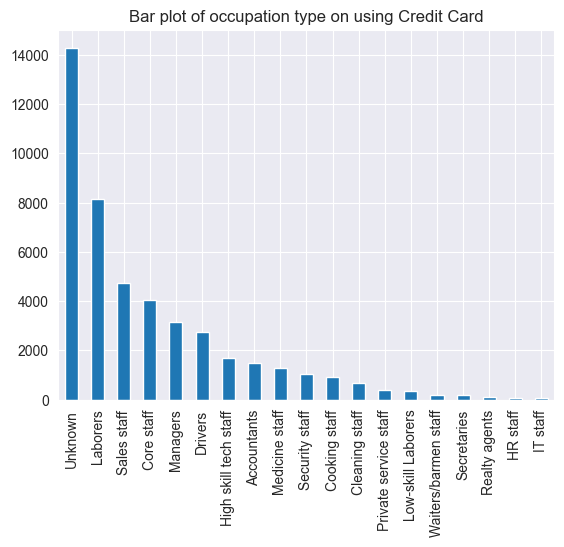

In [4]:

train_df.occupation_type.value_counts().plot(kind='bar')
plt.title('Bar plot of occupation type on using Credit Card')
plt.grid(True)
plt.show()

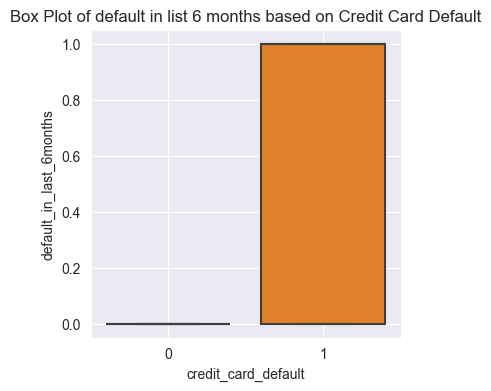

In [5]:
import seaborn as sns
# Box plot of 'credit_score' based on 'credit_card_default'
plt.figure(figsize=(4, 4))
sns.boxplot(x='credit_card_default', y='default_in_last_6months', data=train_df)
plt.title('Box Plot of default in list 6 months based on Credit Card Default')
plt.grid(True)
plt.show()

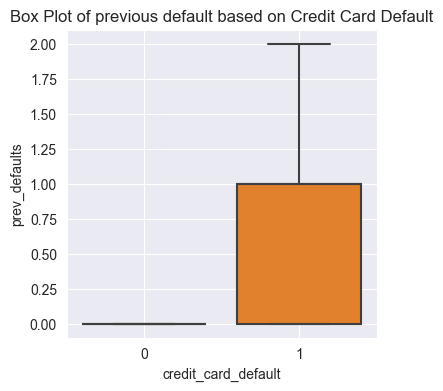

In [6]:
# Box plot of 'credit_score' based on 'credit_card_default'
plt.figure(figsize=(4, 4))
sns.boxplot(x='credit_card_default', y='prev_defaults', data=train_df)
plt.title('Box Plot of previous default based on Credit Card Default')
plt.grid(True)
plt.show()

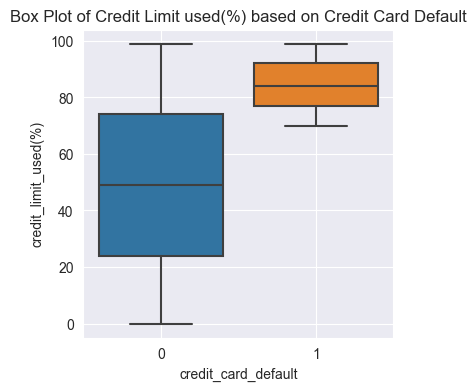

In [7]:
# Box plot of 'credit_score' based on 'credit_card_default'
plt.figure(figsize=(4, 4))
sns.boxplot(x='credit_card_default', y='credit_limit_used(%)', data=train_df)
plt.title('Box Plot of Credit Limit used(%) based on Credit Card Default')
plt.grid(True)
plt.show()


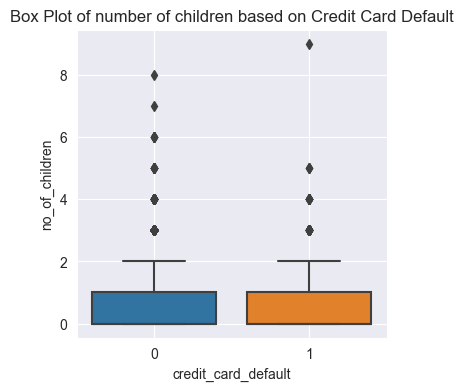

In [8]:
# Box plot of 'credit_score' based on 'credit_card_default'
plt.figure(figsize=(4, 4))
sns.boxplot(x='credit_card_default', y='no_of_children', data=train_df)
plt.title('Box Plot of number of children based on Credit Card Default')
plt.grid(True)
plt.show()

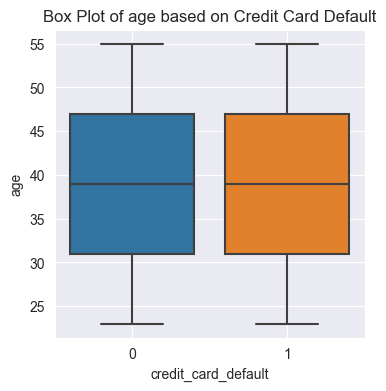

In [9]:
# Box plot of 'credit_score' based on 'credit_card_default'
plt.figure(figsize=(4, 4))
sns.boxplot(x='credit_card_default', y='age', data=train_df)
plt.title('Box Plot of age based on Credit Card Default')
plt.grid(True)
plt.show()

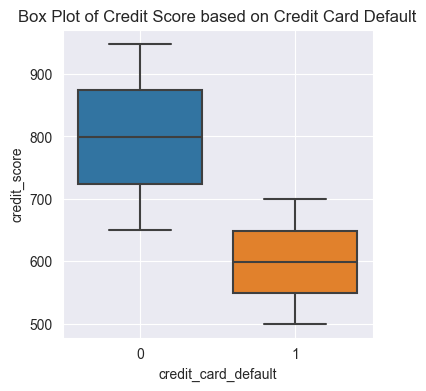

In [10]:
# Box plot of 'credit_score' based on 'credit_card_default'
plt.figure(figsize=(4, 4))
sns.boxplot(x='credit_card_default', y='credit_score', data=train_df)
plt.title('Box Plot of Credit Score based on Credit Card Default')
plt.grid(True)
plt.show()

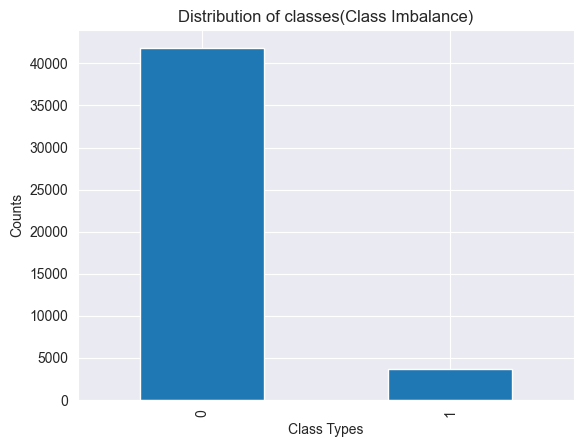

In [11]:
train_df.credit_card_default.value_counts().plot(kind='bar')
plt.xlabel('Class Types')
plt.ylabel('Counts')
plt.title('Distribution of classes(Class Imbalance)')
plt.xticks(rotation=90)
plt.show()

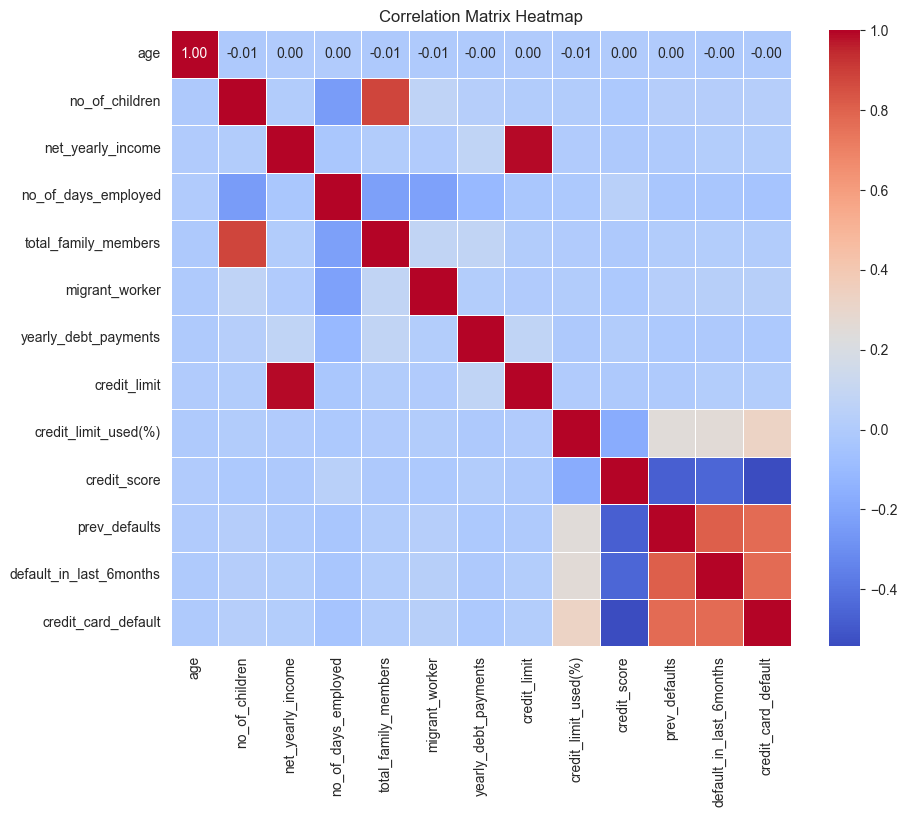

In [12]:

# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

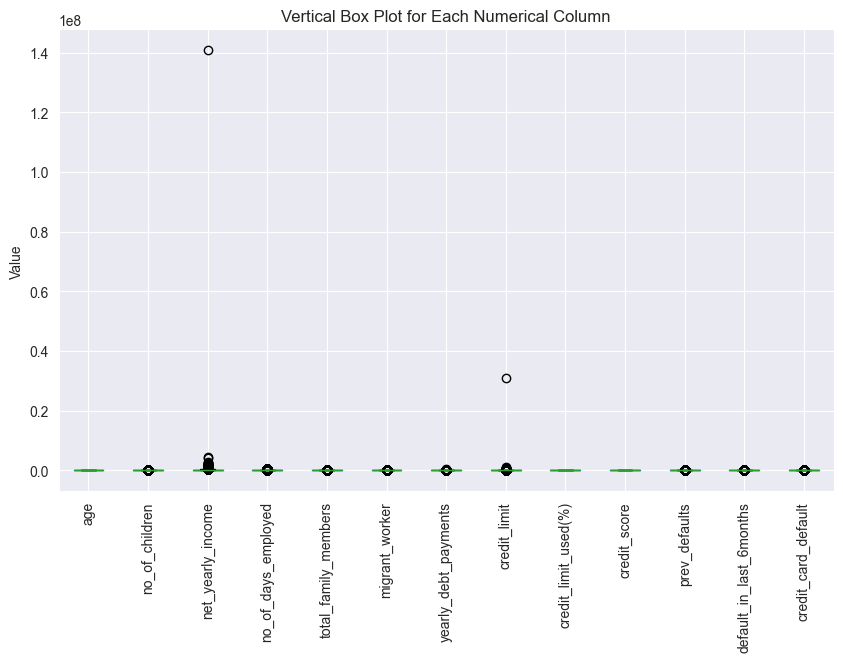

In [13]:
#plot to check range of numerical columns
import pandas as pd
import matplotlib.pyplot as plt
train_df.boxplot(vert=True, figsize=(10, 6))
plt.title('Vertical Box Plot for Each Numerical Column')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

#Data Preprocessing
**Missing values in data and imputation<br>
Records with null values are removed and columns such as customer id and name are dropped to maintain data consistency for prediction.


In [14]:
print("Number of missing values in each column:")
print(train_df.isnull().sum())
data_cleaned = train_df.dropna()
data_cleaned = data_cleaned.drop(columns=['customer_id','name'])

Number of missing values in each column:
customer_id                  0
name                         0
age                          0
gender                       0
owns_car                   547
owns_house                   0
no_of_children             774
net_yearly_income            0
no_of_days_employed        463
occupation_type              0
total_family_members        83
migrant_worker              87
yearly_debt_payments        95
credit_limit                 0
credit_limit_used(%)         0
credit_score                 8
prev_defaults                0
default_in_last_6months      0
credit_card_default          0
dtype: int64


In [15]:
numeric_columns = data_cleaned.select_dtypes(include=['number'])
text_columns = data_cleaned.select_dtypes(include=['object']).columns # Select numeric columns
binary_columns = ['migrant_worker','prev_defaults','default_in_last_6months','credit_card_default']
numeric_columns = numeric_columns.drop(columns=binary_columns, axis= 1)

# Calculate the quartiles (Q1 and Q3) and the interquartile range (IQR) for each numeric column
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to detect outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Checking upper bound for outliers, lower bound of data is 0 which is well within 1.5 interquartile range")
print(upper_bound)





Checking upper bound for outliers, lower bound of data is 0 which is well within 1.5 interquartile range
age                         71.000
no_of_children               2.500
net_yearly_income       412481.200
no_of_days_employed      13124.500
total_family_members         4.500
yearly_debt_payments     72587.295
credit_limit             97737.905
credit_limit_used(%)       157.000
credit_score              1111.500
dtype: float64


#Checking columns with outliers and removing records which fall above 1.5 inter quartile range. Further performed one hot encoding on categorical data for further data processing.

In [20]:

print("Printing columns having outliers based upon 1.5 inter quartile range")
for i, column in enumerate(numeric_columns):
  if (min(data_cleaned[column]) < lower_bound[column]) or (max(data_cleaned[column]) > upper_bound[column]):
    print(f'{i}: {column}')



# Detect outliers using the lower and upper bounds
outliers = (numeric_columns < lower_bound) | (numeric_columns > upper_bound)
rows_with_outliers = np.where(outliers.any(axis=1))[0]

print("Droping rows with outliers")


# Delete rows based on the list of row numbers
data = data_cleaned.drop(data_cleaned.index[rows_with_outliers])
# Remove outliers by replacing them with NaN values

# check for columns with out liers

for i,column in enumerate(numeric_columns):
  if (min(data[column]) < lower_bound[column]) or (max(data[column]) > upper_bound[column]):
    print(f' {i}: {column}')

print("Performing one hot encoding on the data")



one_hot_encoded_data = pd.get_dummies(data, columns=list(text_columns))

Printing columns having outliers based upon 1.5 inter quartile range
1: no_of_children
2: net_yearly_income
3: no_of_days_employed
4: total_family_members
5: yearly_debt_payments
6: credit_limit
Droping rows with outliers
Performing one hot encoding on the data


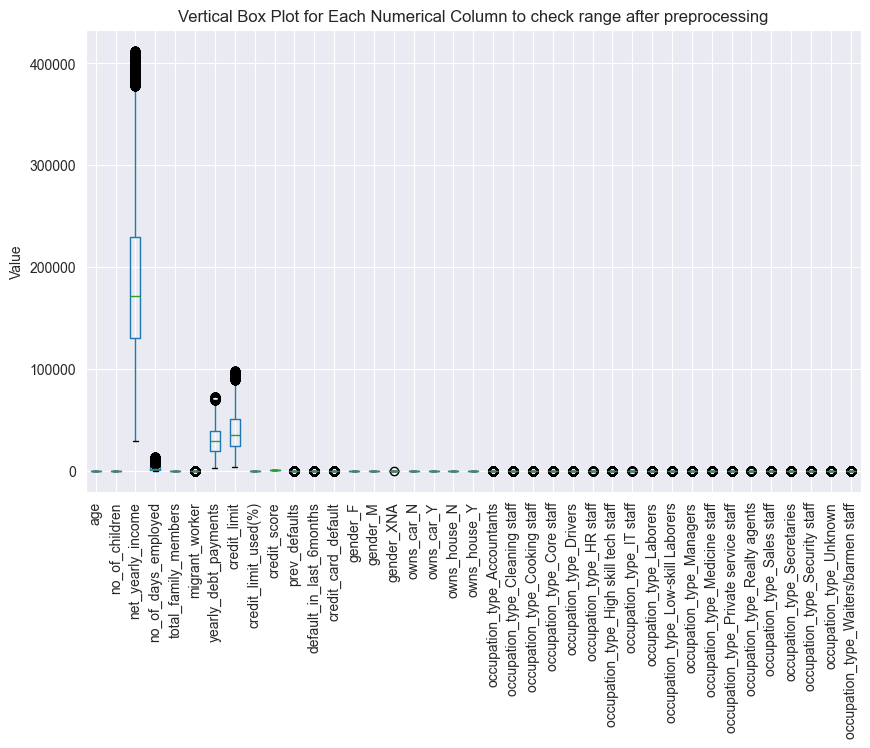

In [21]:
one_hot_encoded_data.boxplot(vert=True, figsize=(10, 6))
plt.title('Vertical Box Plot for Each Numerical Column to check range after preprocessing')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

# Splitting  data in training and test with 80, 20 split and checking shape of the datasets.

In [22]:

from sklearn.model_selection import train_test_split




y = one_hot_encoded_data['credit_card_default']
X = one_hot_encoded_data.drop(columns=['credit_card_default'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("Training set - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set - Features:", X_test.shape, "Target:", y_test.shape)


Training set - Features: (22353, 38) Target: (22353,)
Testing set - Features: (9581, 38) Target: (9581,)


# Normalizing data using standard scalar

In [23]:

def normalize(data):
    scaler = StandardScaler()
    columns_to_normalize = numeric_columns.columns
    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
    return data

X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)



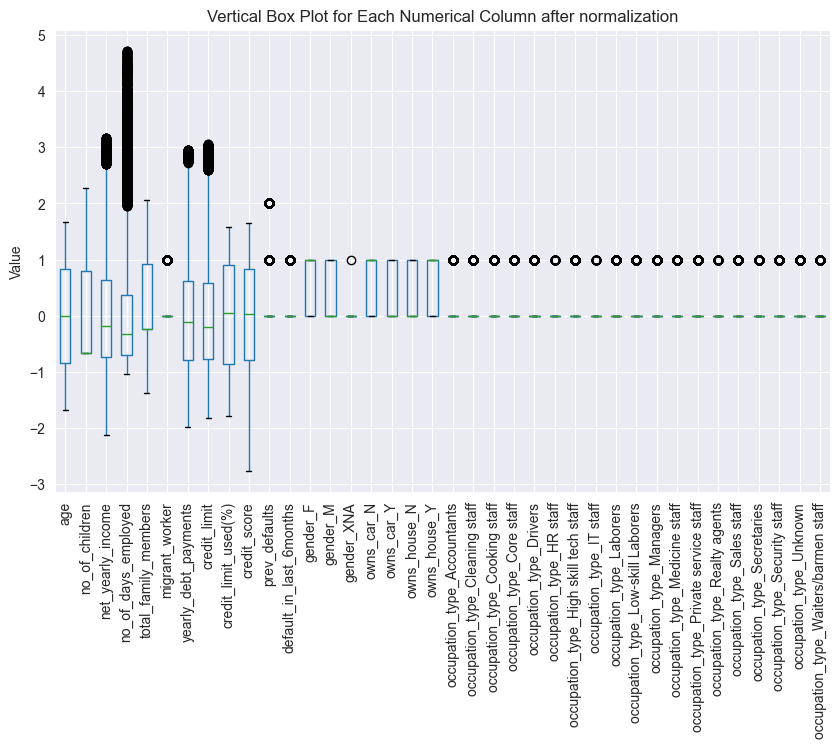

In [26]:
X_train_normalized.boxplot(vert=True, figsize=(10, 6))
plt.title('Vertical Box Plot for Each Numerical Column after normalization')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

# Since we have a huge class imbalance of 10:1, we oversampled the minority class to introduce balance using ADASYN and printed the shape of dataset.

In [25]:



# Apply a combination of over-sampling and under-sampling using SMOTEENN

def smoteData(xtrain, ytrain):

    #smote_enn = SMOTEENN(random_state=42)
    # Apply ADASYN to generate synthetic samples
    adasyn = ADASYN(random_state=42)
    X_train_resampled, y_train_resampled = adasyn.fit_resample(xtrain, ytrain)
    return X_train_resampled, y_train_resampled


X_train_resampled, y_train_resampled = smoteData(X_train_normalized, y_train)



In [27]:
X_train_resampled.shape, y_train_resampled.shape

((40532, 38), (40532,))

# Models and Feature Engineering

#PCA with Logistic regression and hyper parameter tuning,

PCA in logistic regression can be used to reduce dimensionality, and enhance model stability by transforming correlated features into uncorrelated principal components, aiding in computational efficiency and mitigating overfitting. <br>

In the upcoming models we will draw inferences from PCA to know number of principal components and comapre our results with normal Logistic regression with CV and normal Logistic regression. We will also try to conclude which model works better with class imbalances and based upon our finding we will use the strategy  to gett better model performances. <br>











In [196]:



# Create a pipeline with PCA and Logistic Regression
pipeline = Pipeline([
    ('pca', PCA()),
    ('logreg', LogisticRegression())
])

# Define the parameter grid for grid search
param_grid = {
    'pca__n_components': range(1, len(X_train_normalized.columns) + 1),
    'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logreg__class_weight': [None, 'balanced', {0: 1, 1: imbalance_ratio}],
    'logreg__max_iter': [100, 500]
}

# Define scoring metrics
scoring = {
    'AUC': 'roc_auc',
    'Balanced Accuracy': make_scorer(balanced_accuracy_score)
}

# Create a Stratified K-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, scoring=scoring, cv=cv, refit='AUC')
grid_search.fit(X_train_normalized, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Use the best model for prediction on the test set
y_prob = best_model.predict_proba(X_test_normalized)[:, 1]
y_pred = best_model.predict(X_test_normalized)

In [197]:
best_params_logistic_PCA = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_logistic_PCA)

best_model_logistic_PCA = grid_search.best_estimator_



Best Hyperparameters:
{'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__max_iter': 500, 'pca__n_components': 8}


8
Top 8 eigenvalues: [2.00823599 1.88541735 1.23508802 1.0046527  0.99666448 0.82036103
 0.74969562 0.58691437]
Explained variance ratios of the principal components: [0.17415056 0.16349995 0.10710458 0.08712165 0.08642893 0.07114021
 0.06501224 0.05089614]


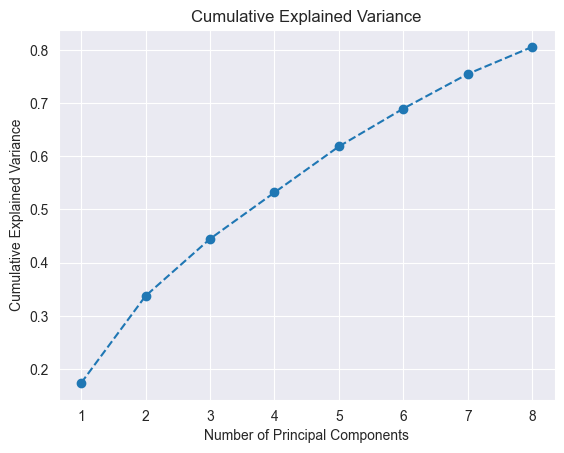

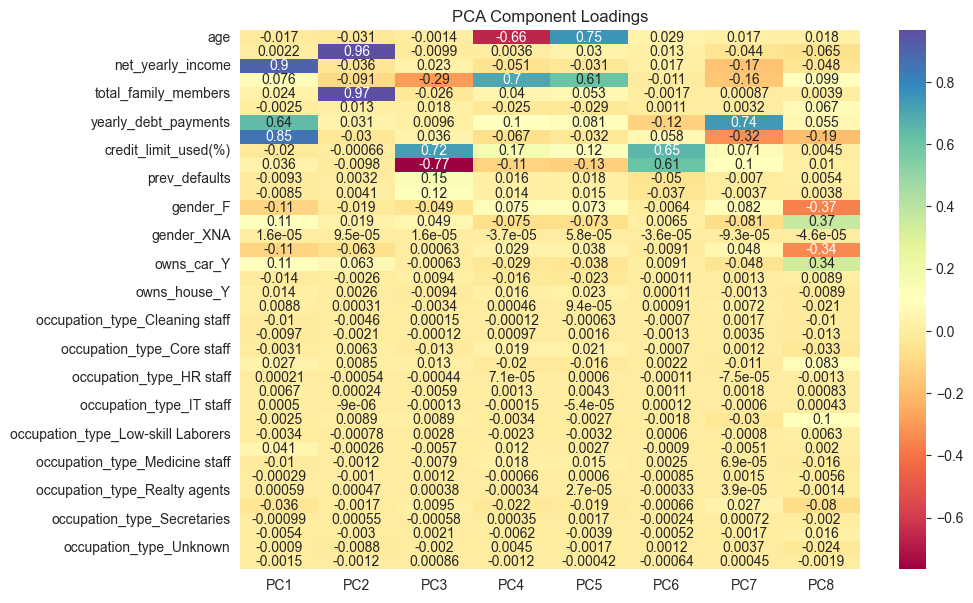

Most influential features for PC1: ['net_yearly_income', 'credit_limit', 'yearly_debt_payments']
Most influential features for PC2: ['total_family_members', 'no_of_children', 'no_of_days_employed']
Most influential features for PC3: ['credit_score', 'credit_limit_used(%)', 'no_of_days_employed']
Most influential features for PC4: ['no_of_days_employed', 'age', 'credit_limit_used(%)']
Most influential features for PC5: ['age', 'no_of_days_employed', 'credit_score']
Most influential features for PC6: ['credit_limit_used(%)', 'credit_score', 'yearly_debt_payments']
Most influential features for PC7: ['yearly_debt_payments', 'credit_limit', 'net_yearly_income']
Most influential features for PC8: ['gender_M', 'gender_F', 'owns_car_Y']


In [217]:
pca_8_components = PCA(n_components=8)
x_train_pca = pca_8_components.fit_transform(X_train_normalized)
print(len(x_train_pca[0]))
# Access eigenvalues and explained variance ratios
eigenvalues = pca_8_components.explained_variance_
explained_variance_ratio = pca_8_components.explained_variance_ratio_

print(f'Top 8 eigenvalues: {eigenvalues}')
print(f'Explained variance ratios of the principal components: {explained_variance_ratio}')

# Visualize explained variance ratios
cumulative_explained_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pc_df = pd.DataFrame(data=x_train_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])

# Get the loadings for the principal components
loadings = pca_8_components.components_.T * np.sqrt(pca_8_components.explained_variance_)

# Create a DataFrame for loadings
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'], index=X_train.columns)

# Visualizing the loadings
plt.figure(figsize=(10, 7))
sns.heatmap(loading_matrix, annot=True, cmap='Spectral')
plt.title("PCA Component Loadings")
plt.show()

# Identifying most influential features for each principal component
for i in range(loading_matrix.shape[1]):
    pc = loading_matrix.iloc[:, i]
    most_influential = pc.abs().sort_values(ascending=False).head(3).index.tolist()
    print(f"Most influential features for PC{i+1}: {most_influential}")


In [208]:
train_pred = best_model_logistic_PCA.predict(X_train_normalized)
print("\nTrain Set  Accuracy:", accuracy_score(y_train, train_pred))


Train Set  Accuracy: 0.9766474298751845


Best Number of Components: 8

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8720
           1       0.94      0.79      0.86       861

    accuracy                           0.98      9581
   macro avg       0.96      0.89      0.92      9581
weighted avg       0.98      0.98      0.98      9581


Test Set Confusion Matrix:
 [[8680   40]
 [ 179  682]]

Test Set AUC: 0.9931625536766507

Test Set Balanced Accuracy: 0.8937575253865252

Test Set  Accuracy: 0.9771422607243503
Overall F1 Score: 0.976229
Overall Precision: 0.976632
Overall Recall: 0.977142


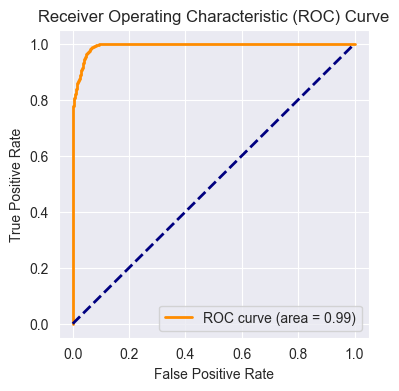

In [202]:

# Print the results
print("Best Number of Components:", best_model.named_steps['pca'].n_components)
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))
print("\nTest Set Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set AUC:", roc_auc_score(y_test, y_prob))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set  Accuracy:", accuracy_score(y_test, y_pred))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Normal Logistic Regression

In [45]:


# Ignore all warnings
warnings.filterwarnings("ignore")

model = LogisticRegression()

model.fit(X_train_normalized, y_train)


y_prob_test = model.predict_proba(X_test_normalized)[:, 1]
y_pred_test = model.predict(X_test_normalized)
y_pred_train = model.predict(X_train_normalized)



In [46]:

import seaborn as sns
# Calculate and print various metrics for the test set
print("\nTrain Set Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Set Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Set ROC AUC Score:", roc_auc_score(y_test, y_prob_test))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')





Train Set Accuracy: 0.9774079541895943

Test Set Accuracy: 0.9777685001565598

Test Set Balanced Accuracy: 0.8914846588669032

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8720
           1       0.96      0.79      0.86       861

    accuracy                           0.98      9581
   macro avg       0.97      0.89      0.93      9581
weighted avg       0.98      0.98      0.98      9581


Test Set Confusion Matrix:
 [[8691   29]
 [ 184  677]]

Test Set ROC AUC Score: 0.9932110358128483
Overall F1 Score: 0.976767
Overall Precision: 0.977439
Overall Recall: 0.977769


In [0]:
# Logistic regression with hyper parameter tuning and StratifiedKFold to compensate class imbalance.

In [28]:

# Ignore all warnings
warnings.filterwarnings("ignore")

imbalance_ratio =  len(y_train[y_train == 0]) / len(y_train[y_train == 1])


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced', {0: 1, 1: imbalance_ratio}],
    'max_iter': [100, 500]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='balanced_accuracy')
grid_search.fit(X_train_normalized, y_train)

best_model = grid_search.best_estimator_

y_prob = best_model.predict_proba(X_test_normalized)[:, 1]
y_pred = best_model.predict(X_test_normalized)
y_pred_train = best_model.predict(X_train_normalized)


In [29]:
best_params_logistic = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_logistic)

best_model_logistic = grid_search.best_estimator_


Best Hyperparameters:
{'C': 0.001, 'class_weight': 'balanced', 'max_iter': 100}



Top 10 Coefficients:
credit_score: -1.3960869630755577
credit_limit_used(%): 0.9046768802032723
prev_defaults: 0.5448629288986447
default_in_last_6months: 0.5079493504084632
no_of_days_employed: -0.1623606144145647
gender_M: 0.06889947412165698
gender_F: -0.0687614413529861
net_yearly_income: -0.0519969473059753
occupation_type_Laborers: 0.043261164357013535
owns_car_Y: -0.037626318153419644


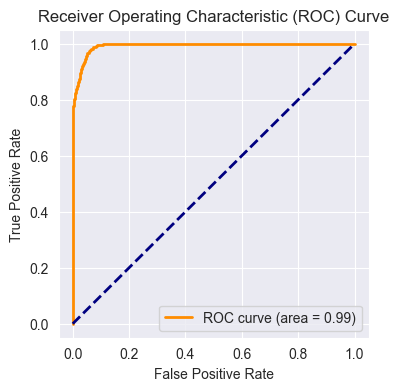

In [30]:

# Fit the model on the entire resampled training data for feature importance
best_model.fit(X_train_normalized, y_train)

# Extract and print the top 10 coefficients
coefs = best_model.coef_[0]
top_10_indices = np.argsort(np.abs(coefs))[::-1][:10]
top_10_features = X_train_normalized.columns[top_10_indices]
top_10_coefs = coefs[top_10_indices]

print("\nTop 10 Coefficients:")
for feature, coef in zip(top_10_features, top_10_coefs):
    print(f"{feature}: {coef}")

# Plot the ROC curve for the entire resampled training dataset
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Use the best model for prediction on the test set
 # You can replace this with the best model from hyperparameter tuning
y_pred_test = best_model.predict(X_test_normalized)
y_prob_test = best_model.predict_proba(X_test_normalized)[:, 1]


In [42]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
import seaborn as sns

print("\nTrain Set Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred_test))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred_test))
print("\nTest Set Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nTest Set ROC AUC Score:", roc_auc_score(y_test, y_prob_test))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')





Train Set Accuracy: 0.9454211962600099

Test Set Accuracy: 0.9463521553073792

Test Set Balanced Accuracy: 0.9563962455646837

Test Set Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      8720
           1       0.63      0.97      0.76       861

    accuracy                           0.95      9581
   macro avg       0.81      0.96      0.87      9581
weighted avg       0.96      0.95      0.95      9581


Test Set Confusion Matrix:
 [[8233  487]
 [  27  834]]

Test Set ROC AUC Score: 0.9929744856098627
Overall F1 Score: 0.951280
Overall Precision: 0.963895
Overall Recall: 0.946352



In summary, the logistic regression model with stratified k-fold and hyperparameter tuning seems to perform reasonably well on the imbalanced dataset, and introducing PCA in addition to these techniques has a marginal positive impact.

#Support Vector Machine:
Here we are going to perform hyper parameter such as Kernel, C, and gamma tuning to check best parameters to use with SVM.

In [51]:
from sklearn.naive_bayes import GaussianNB
b_classifier = GaussianNB()

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()
# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')


Accuracy: 0.9680617889573113

Test Set Balanced Accuracy: 0.8552726321005019
Confusion Matrix:
[[8657   63]
 [ 243  618]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      8720
           1       0.91      0.72      0.80       861

    accuracy                           0.97      9581
   macro avg       0.94      0.86      0.89      9581
weighted avg       0.97      0.97      0.97      9581

Overall F1 Score: 0.966361


# K Nearest neighbours

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a kNN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=2)

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_test.to_numpy())

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')


Accuracy: 0.9694186410604321
Confusion Matrix:
[[8702   18]
 [ 275  586]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8720
           1       0.97      0.68      0.80       861

    accuracy                           0.97      9581
   macro avg       0.97      0.84      0.89      9581
weighted avg       0.97      0.97      0.97      9581


Test Set Balanced Accuracy: 0.8392698643565728
Overall F1 Score: 0.966958


In [209]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define the SVM pipeline without a scaler
svc = SVC()

# Set the parameters you want to search through
param_grid = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# Create a pipeline without a scaler
model = Pipeline(steps=[('svc', svc)])

# Set up GridSearchCV
scorer = make_scorer(balanced_accuracy_score)
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=cv, n_jobs=-1)

# Fit the model with the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [210]:
best_params_SVM = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_SVM)

best_model_SVM = grid_search.best_estimator_

Best Hyperparameters:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


Accuracy of the SVM classifier on train set: 0.992006
Accuracy of the SVM classifier on test set: 0.968584
ROC AUC Score: 0.9916055312256923

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      8720
           1       0.80      0.87      0.83       861

    accuracy                           0.97      9581
   macro avg       0.89      0.92      0.91      9581
weighted avg       0.97      0.97      0.97      9581


Confusion Matrix:
 [[8534  186]
 [ 115  746]]

Test Set Balanced Accuracy: 0.9225520517000714

Test Set  Accuracy: 0.9685836551508193
Overall F1 Score: 0.969141
Overall Precision: 0.969964
Overall Recall: 0.968584


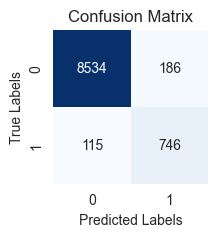

In [212]:

# Predict on the test data
y_pred = best_model.predict(X_test_normalized)
y_prob = best_model.decision_function(X_test_normalized)
y_pred_train = best_model.predict(X_train_resampled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'Accuracy of the SVM classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the SVM classifier on test set: {accuracy:.6f}')
print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set  Accuracy:", accuracy_score(y_test, y_pred))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the best hyperparameters


In [0]:
# Suport vector machine with liner kernel

Accuracy of the SVM classifier on test set: 0.954285

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97      8720
           1       0.68      0.93      0.79       861

    accuracy                           0.95      9581
   macro avg       0.84      0.94      0.88      9581
weighted avg       0.96      0.95      0.96      9581


Confusion Matrix:
 [[8340  380]
 [  58  803]]

ROC AUC Score: 0.9916055312256923


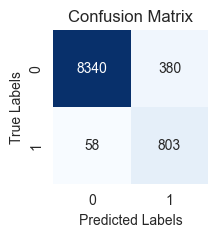

In [214]:

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
svc_linear = SVC(kernel='linear', gamma='scale' , C=  10)

# It's often a good idea to scale your data for SVM
# Fit the SVM model
svc_linear.fit(X_train_resampled, y_train_resampled )
# Predict on the test data
y_pred = svc_linear.predict(X_test_normalized)
# You can now compare y_pred to y_test to evaluate the model performance
# For example, using accuracy_score:
from sklearn.metrics import accuracy_score


# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the SVM classifier on test set: {accuracy:.6f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Results SVM with linear & non linear kernel:
Both models have high accuracy, indicating good overall performance.
The non-linear kernel SVM has a slightly higher accuracy compared to the linear kernel SVM showing slight non linearity in data.
The non-linear kernel SVM has a higher number of true positives (746) compared to the linear kernel SVM (803), but it also has a higher number of false negatives (115).

#Decision Trees and Random forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits


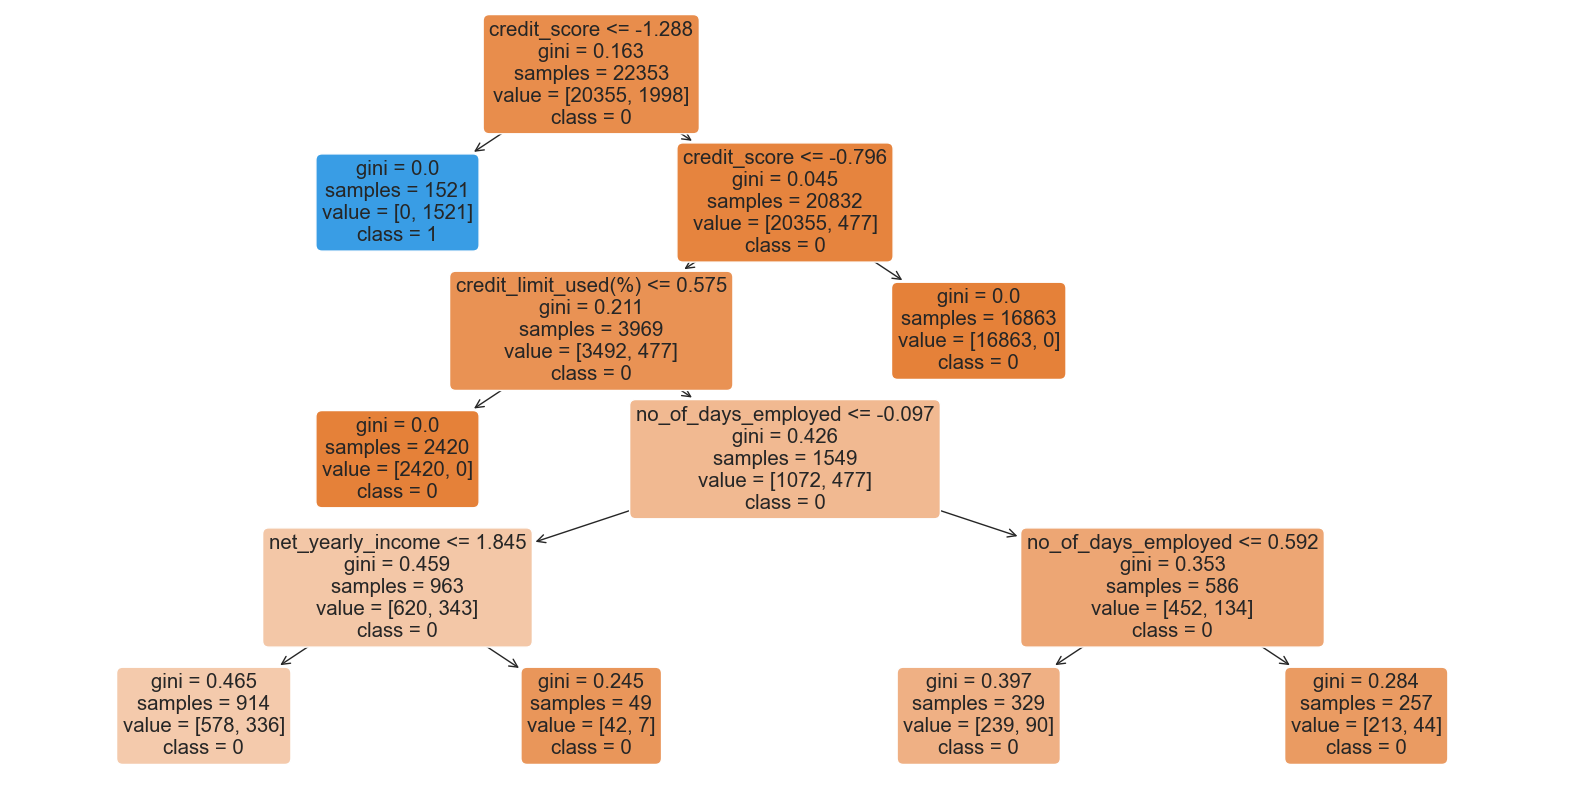

In [254]:

param_grid = {
    'max_depth': [None, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train_normalized, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.show()


In [218]:



param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [219]:
best_params_RF = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params_RF)

best_model_RF = grid_search.best_estimator_

Best Hyperparameters:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


                    Feature  Importance
9              credit_score    0.373684
10            prev_defaults    0.259048
11  default_in_last_6months    0.198503
8      credit_limit_used(%)    0.064804
3       no_of_days_employed    0.017983
7              credit_limit    0.015625
2         net_yearly_income    0.015621
6      yearly_debt_payments    0.015502
0                       age    0.011820
4      total_family_members    0.003725


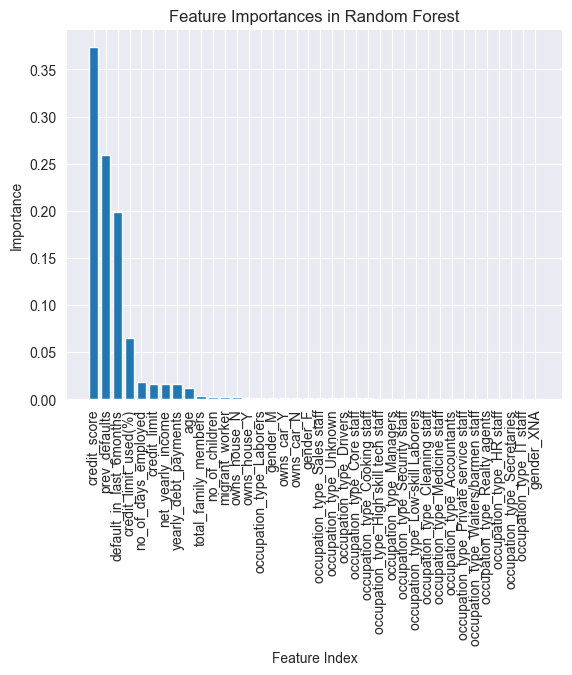

Accuracy of the classifier on train set: 0.990024
Accuracy of the classifier on test set: 0.977873

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      8720
           1       1.00      0.75      0.86       861

    accuracy                           0.98      9581
   macro avg       0.99      0.88      0.92      9581
weighted avg       0.98      0.98      0.98      9581


Confusion Matrix:
 [[8719    1]
 [ 211  650]]

Test Set Balanced Accuracy: 0.8774107209453483

Test Set Accuracy: 0.9778728733952614
Overall F1 Score: 0.976468
Overall Precision: 0.978357
Overall Recall: 0.977873


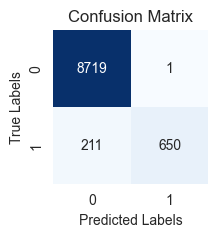

In [224]:

# Feature Importances (assuming X_train_resampled has column names)
feature_importances = best_model.feature_importances_
feature_val = X_train.columns

# Create a DataFrame to display the feature importances
importances_df = pd.DataFrame({'Feature': feature_val, 'Importance': feature_importances})
importances_df = importances_df.sort_values('Importance', ascending=False)

# Display the top features
print(importances_df.head(10))

# Plot the feature importances
plt.bar(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.xticks(rotation=90)
plt.show()

# Evaluate the model performance
y_pred = best_model.predict(X_test)
y_pred_train = best_model.predict(X_train)


accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, y_pred_train)




print(f'Accuracy of the classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the classifier on test set: {accuracy:.6f}')

# Uncomment the following line if ROC AUC is applicable
# print("ROC AUC Score:", roc_auc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_f1_score = f1_score(y_test, y_pred, average='weighted')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall F1 Score: {overall_f1_score:.6f}')
print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Through the random forest model and decision tree we can draw following conclusions: <br>


The model identifies around 9 important features which is quite close to the result of PCA where principal components were 8. <br>

Through, logistic regression coefficients, Decision tree, and random forest results we could say, credit score plays an important factor determining credit card default followed by previous default and credit limit used. <br>

Credit limit used, net yearly income, and number of days employed are other important factors in determining the default but not as significant as credit score and default history. <br>


In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier()

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
overall_f1_score = f1_score(y_test, y_pred, average='weighted')
print(f'Overall F1 Score: {overall_f1_score:.6f}')


Accuracy: 0.9732804508923912
Confusion Matrix:
[[8633   87]
 [ 169  692]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      8720
           1       0.89      0.80      0.84       861

    accuracy                           0.97      9581
   macro avg       0.93      0.90      0.91      9581
weighted avg       0.97      0.97      0.97      9581


Test Set Balanced Accuracy: 0.896869772187237
Overall F1 Score: 0.972675


Tree based methods worked  better on prediction without over sampling the data, showing they are robust to class imbalance.

#Neural Network

Epoch 1/20
570/570 [==============================] - 2s 2ms/step - loss: 0.2482 - accuracy: 0.8935 - val_loss: 0.0908 - val_accuracy: 0.9852
Epoch 2/20
570/570 [==============================] - 1s 2ms/step - loss: 0.1157 - accuracy: 0.9602 - val_loss: 0.0798 - val_accuracy: 0.9798
Epoch 3/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0986 - accuracy: 0.9656 - val_loss: 0.0726 - val_accuracy: 0.9810
Epoch 4/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9693 - val_loss: 0.0864 - val_accuracy: 0.9768
Epoch 5/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0828 - accuracy: 0.9698 - val_loss: 0.0743 - val_accuracy: 0.9815
Epoch 6/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9730 - val_loss: 0.0629 - val_accuracy: 0.9857
Epoch 7/20
570/570 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9728 - val_loss: 0.0704 - val_accuracy: 0.9859
Epoch 

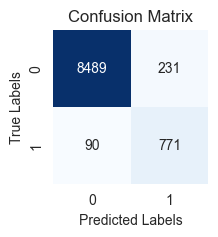

In [225]:

model = Sequential()
model.add(Dense(64, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, verbose=1, validation_split=0.1)

model_nn_sequential = model
# Predict on the testing data
predictions = model.predict(X_test_normalized)
predictions_train = model.predict(X_train_resampled)
y_pred_train = np.round(predictions_train).flatten()

y_pred = np.round(predictions).flatten()

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)



print(f'Accuracy of the classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the classifier on test set: {accuracy:.6f}')


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_f1_score = f1_score(y_test, y_pred, average='weighted')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall F1 Score: {overall_f1_score:.6f}')
print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Result Interpretation:

Balanced accuracy in NN is quite high with over sampled data, demonstrating higher performance.
We achieved high test accuracy of 96% and balanced accuracy of 93.4 percent which is quite remarkable


# Important Feature interpretibility with lime:


In [263]:

# Train the classifier on the training data
best_model_RF.fit(X_train_resampled, y_train_resampled)

explainer = lime_tabular.LimeTabularExplainer(X_train_resampled.values, feature_names=X_train.columns, class_names=['Default', 'Not Default'], discretize_continuous=True, mode='classification')
instance = X_test_normalized.iloc[1]
explanation = explainer.explain_instance(instance, best_model_RF.predict_proba, num_features=len(X_train.columns))
explanation.show_in_notebook()

In [0]:
from lime import lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train_resampled.values, feature_names=X_train.columns, class_names=['Default', 'Not Default'], discretize_continuous=True, mode='classification')
instance = X_test_normalized.iloc[X_test_normalized.index.get_loc(11437)]
explanation = explainer.explain_instance(instance, best_model_RF.predict_proba, num_features=len(X_train.columns))
explanation.show_in_notebook()

In [264]:
from lime import lime_tabular
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(random_state=42)


random_forest.fit(X_train_resampled, y_train_resampled)

explainer = lime_tabular.LimeTabularExplainer(X_train_resampled.values, feature_names=X_train.columns, class_names=['Default', 'Not Default'], discretize_continuous=True, mode='classification')
instance = X_test_normalized.iloc[X_test_normalized.index.get_loc(11437)]
explanation = explainer.explain_instance(instance, random_forest.predict_proba, num_features=len(X_train.columns))
explanation.show_in_notebook()

In [0]:
# SGDClassifier with hyper parameter tuning

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Accuracy of the classifier on train set: 0.968001
Accuracy of the classifier on test set: 0.966496

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97      8720
           1       0.66      0.94      0.78       861

    accuracy                           0.95      9581
   macro avg       0.83      0.95      0.87      9581
weighted avg       0.96      0.95      0.96      9581


Confusion Matrix:
 [[8307  413]
 [  53  808]]

Test Set Balanced Accuracy: 0.9455406424149431

Test Set Accuracy: 0.9513620707650559
Overall F1 Score: 0.955055
Overall Precision: 0.963833
Overall Recall: 0.951362


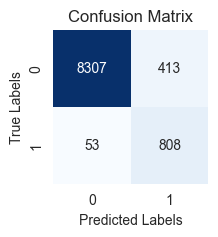

In [233]:

from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, balanced_accuracy_score

# Define the parameter grid
param_grid = {
    'sgdclassifier__alpha': [0.0001, 0.001, 0.01, 0.1],
    'sgdclassifier__l1_ratio': [0, 0.15, 0.5, 0.85, 1],
    # Add other parameters here if necessary
}

# Create the pipeline
pipeline = make_pipeline(
    StandardScaler(),
    SGDClassifier(loss='log_loss', penalty='elasticnet', max_iter=1000, tol=1e-3, random_state=42)
)

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='balanced_accuracy', cv=5, n_jobs=-1, verbose=2)


grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data
y_pred = best_model.predict(X_test_normalized)
y_pred_train = best_model.predict(X_train_resampled)
# Generate and print a classification report
accuracy_train = accuracy_score(y_train_resampled, y_pred_train)



print(f'Accuracy of the classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the classifier on test set: {accuracy:.6f}')


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_f1_score = f1_score(y_test, y_pred, average='weighted')
overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall F1 Score: {overall_f1_score:.6f}')
print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [228]:
best_model_SDG = grid_search.best_estimator_
print(grid_search.best_params_)


{'sgdclassifier__alpha': 0.001, 'sgdclassifier__l1_ratio': 0.15}


Plotting Enet path to show feature convergence with alpha

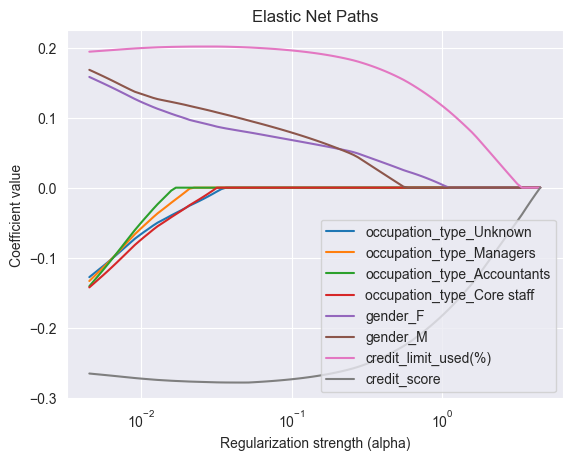

In [231]:

import matplotlib.pyplot as plt
from sklearn.linear_model import enet_path
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming X and y are your dataset features and target

# Compute the Elastic Net path
alphas, coefs, _ = enet_path(X_train_resampled, y_train_resampled, l1_ratio=0.15)  # l1_ratio between 0 and 1
feature_names = X_train_resampled.columns
# Select the four largest coefficients by their maximum absolute value across all alphas
max_coefs = np.argsort(np.max(np.abs(coefs), axis=1))[-8:]



# Plotting the paths
plt.figure()
for coef in max_coefs:
    k = feature_names[coef]
    plt.plot(alphas, coefs[coef], label=f'{k}')

plt.xscale('log')  # Alphas are typically on a log scale
plt.xlabel('Regularization strength (alpha)')
plt.ylabel('Coefficient value')
plt.title('Elastic Net Paths')
plt.legend()
plt.axis('tight')  # Optional: fits the plot more neatly
plt.show()


# Graph neural network to classify nodes

In [234]:
values = [val for val in max_coefs]
features = X_train_resampled.columns
np.random.seed(42)

# Generate random indices
random_indices = np.random.choice(X_train_resampled.index, size=30000, replace=False)

# Extract the samples
new_sample_X = X_train_resampled.loc[random_indices]
new_sample_y = y_train_resampled.loc[random_indices]

# Display the new samples
new_sample_X, new_sample_y

new_sample_X = new_sample_X[features]



In [235]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(new_sample_X)


threshold = 0.8


n = new_sample_X.shape[0]
A = np.zeros((n, n))


for i in range(n):
    for j in range(n):

        if i != j and cosine_sim[i, j] > threshold:
            A[i, j] = 1


In [236]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.data import Data


X_tensor = torch.tensor(new_sample_X.values, dtype=torch.float)
A_tensor = torch.tensor(A, dtype=torch.float)

edge_index = A_tensor.nonzero(as_tuple=False).t()

data = Data(x=X_tensor, edge_index=edge_index)


class SimpleGNN(torch.nn.Module):
    def __init__(self, num_node_features, num_classes):
        super(SimpleGNN, self).__init__()
        self.conv1 = GCNConv(num_node_features, 16)
        self.conv2 = GCNConv(16, 16)
        self.fc = torch.nn.Linear(16, num_classes)


    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)  # Optional: Apply non-linearity before the dense layer
        # Dense layer
        x = self.fc(x)

        return F.log_softmax(x, dim=1)

# Initialize the model
model = SimpleGNN(num_node_features=data.num_node_features, num_classes=2)

# Define a loss function and optimizer
loss_func = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Get the target variable as a tensor
y_tensor = torch.tensor(new_sample_y.values, dtype=torch.long)

# Create a train_mask
train_mask = torch.zeros(y_tensor.size(0), dtype=torch.bool)
train_mask[:int(len(train_mask) * 0.8)] = True

# Add train_mask to data object
data.train_mask = train_mask

# Training loop
for epoch in range(200):
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = loss_func(out[data.train_mask], y_tensor[data.train_mask])
    loss.backward()
    optimizer.step()


In [237]:

test_mask = torch.zeros(y_tensor.size(0), dtype=torch.bool)
test_mask[int(len(test_mask) * 0.8):] = True
data.test_mask = test_mask

# Function to test the model and calculate accuracy
def test_model(model, data, mask):
    model.eval()
    with torch.no_grad():  # Disable gradient calculation
        out = model(data.x, data.edge_index)
        preds = out.argmax(dim=1)  # Get the predictions
        correct = preds[mask] == y_tensor[mask]
        accuracy = int(correct.sum()) / int(mask.sum())  # Calculate accuracy
    return accuracy

# Test the model
accuracy = test_model(model, data, data.test_mask)
print(f"Validation Accuracy: {accuracy:.4f}")



Validation Accuracy: 0.9733


In [238]:
values = [val for val in max_coefs]
features = X_test_normalized.columns
np.random.seed(42)

# Generate random indices


test_sample_X = X_test_normalized
test_sample_Y = y_test


In [239]:
from sklearn.metrics.pairwise import cosine_similarity


cosine_sim = cosine_similarity(test_sample_X)


threshold = 0.8


n = test_sample_X.shape[0]
A = np.zeros((n, n))


for i in range(n):
    for j in range(n):

        if i != j and cosine_sim[i, j] > threshold:
            A[i, j] = 1


Accuracy: 0.9729
Precision: 0.9724
Recall: 0.9729


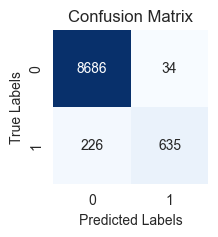

In [247]:

def test_model(model, data, y_tensor):
    model.eval()
    with torch.no_grad():  # Disable gradient calculation
        out = model(data.x, data.edge_index)
        preds = out.argmax(dim=1)  # Get the predictions
        correct = (preds == y_tensor).sum().item()  # Count correct predictions
        accuracy = correct / len(y_tensor)  # Calculate accuracy
        precision = precision_score(y_tensor, preds, average='weighted')
        recall = recall_score(y_tensor, preds, average='weighted')
        balanced_acc = balanced_accuracy_score(y_tensor, preds)
        conf_matrix = confusion_matrix(y_tensor, preds)

    return accuracy, precision, recall, balanced_acc, conf_matrix
# Test the model
X_tensor = torch.tensor(test_sample_X.values, dtype=torch.float)
A_tensor = torch.tensor(A, dtype=torch.float)
edge_index = A_tensor.nonzero(as_tuple=False).t()
data = Data(x=X_tensor, edge_index=edge_index)
y_tensor = torch.tensor(test_sample_Y.values, dtype=torch.long)


accuracy, precision, recall, balanced_acc, conf_matrix1 = test_model(model, data, y_tensor)
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Multi model Ensemble

Ensemble Accuracy: 0.9493
Accuracy of the Ensemble classifier on train set: 0.975624
Accuracy of the  Ensemble classifier on test set: 0.949275

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      8720
           1       0.65      0.97      0.77       861

    accuracy                           0.95      9581
   macro avg       0.82      0.96      0.87      9581
weighted avg       0.96      0.95      0.95      9581


Confusion Matrix:
 [[8264  456]
 [  30  831]]

Test Set Balanced Accuracy: 0.9564316082217179

Test Set Accuracy: 0.9492746059910239
Overall Precision: 0.964868
Overall Recall: 0.949275


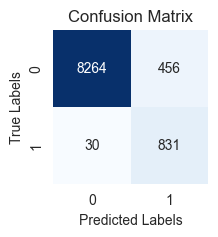

In [250]:

from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(estimators=[
    ('lg', best_model_logistic),
    ('rf', best_model_RF),
    ('svc', best_model_SVM),
    ('pca', best_model_logistic_PCA),
    ('sdg', best_model_SDG)

], voting='hard')
voting_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = voting_classifier.predict(X_test)
y_pred_train = voting_classifier.predict(X_train_resampled)
# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Accuracy: {accuracy:.4f}')

accuracy_train = accuracy_score(y_train_resampled, y_pred_train)




print(f'Accuracy of the Ensemble classifier on train set: {accuracy_train:.6f}')
print(f'Accuracy of the  Ensemble classifier on test set: {accuracy:.6f}')


print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nTest Set Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))

overall_precision = precision_score(y_test, y_pred, average='weighted')
overall_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Overall Precision: {overall_precision:.6f}')
print(f'Overall Recall: {overall_recall:.6f}')

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [54]:
df = train_df

In [55]:
# Iterate through DataFrame rows
customer_profiles=[]
predictions= []
for index, row in df.iterrows():
    customer_profiles.append(
        f"The customer is {row['age']} years old, owning {row['owns_house']} house and {row['owns_car']} car, "
        f"has {row['no_of_children']} children, with a net yearly income of ${row['net_yearly_income']}. "
        f"They are {'employed' if row['no_of_days_employed'] == 'yes' else 'unemployed'} for {row['no_of_days_employed']} days, "
        f"working as a {row['occupation_type']}, and have a total family of {row['total_family_members']} members. "
        f"The customer incurs yearly debt payments of ${row['yearly_debt_payments']}, "
        f"has a credit limit of ${row['credit_limit']} with {row['credit_limit_used(%)']}% utilization, "
        f"possesses a credit score of {row['credit_score']}, with {'no' if row['prev_defaults'] == 'no' else 'some'} previous defaults, "
        f"and has {'not ' if row['default_in_last_6months'] == 'no' else ''}defaulted on any credit card payments in the last 6 months.")
    predictions.append(row['credit_card_default'])

# Display the statement for each row
print(customer_profiles[5])


The customer is 46 years old, owning N house and Y car, has 0.0 children, with a net yearly income of $252765.91. They are unemployed for 2898.0 days, working as a Accountants, and have a total family of 2.0 members. The customer incurs yearly debt payments of $37046.86, has a credit limit of $40245.64 with 19% utilization, possesses a credit score of 937.0, with some previous defaults, and has defaulted on any credit card payments in the last 6 months.


In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset, random_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load your dataset and preprocess it
# Assume 'texts' is a list of sentences and 'labels' is a list of corresponding labels (0 or 1 for binary classification)

# Split the data into training and validation sets
texts_train, texts_val, labels_train, labels_val = train_test_split(customer_profiles, predictions, test_size=0.2, random_state=42)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)  # Change num_labels for the number of classes

# Tokenize and encode the sentences
tokens_train = tokenizer(texts_train, padding=True, truncation=True, return_tensors='pt')
tokens_val = tokenizer(texts_val, padding=True, truncation=True, return_tensors='pt')

# Create DataLoader for training and validation sets
dataset_train = TensorDataset(tokens_train['input_ids'], tokens_train['attention_mask'], torch.tensor(labels_train))
dataset_val = TensorDataset(tokens_val['input_ids'], tokens_val['attention_mask'], torch.tensor(labels_val))

dataloader_train = DataLoader(dataset_train, batch_size=8, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=8, shuffle=False)

# Set up training parameters
optimizer = AdamW(model.parameters(), lr=1e-5)
num_epochs = 1

# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch in tqdm(dataloader_train, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        input_ids, attention_mask, labels = batch
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

# Evaluation
model.eval()
predictions = []
true_labels = []

for batch in tqdm(dataloader_val, desc='Evaluating'):
    input_ids, attention_mask, labels = batch
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    logits = outputs.logits
    predictions.extend(torch.argmax(logits, dim=1).tolist())
    true_labels.extend(labels.tolist())

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Validation Accuracy: {accuracy}')


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')